# Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data from the data source
data1 = '/Users/julia/Desktop/3115_info/COMP3115 _source/data/building_list_eng.csv'  # List of buildings
data2 = '/Users/julia/Desktop/3115_info/COMP3115 _source/data/enhanced_sur_covid_19_eng.csv' # Latest local situation
data3 = '/Users/julia/Desktop/3115_info/COMP3115 _source/data/flights_trains_list_eng.csv' # vehicles
data4 = '/Users/julia/Desktop/3115_info/COMP3115 _source/data/areas_in_mainland_china_have_reported_cases_eng.csv' # china mainland data
data5 = '/Users/julia/Desktop/3115_info/COMP3115 _source/data/countries_areas_outside_mainland_china_have_reported_cases_eng.csv' # Countries areas outside mainland china

In [3]:
df_sit = pd.read_csv(data2)
df_bul = pd.read_csv(data1)
df_veh = pd.read_csv(data3)
df_mai = pd.read_csv(data4)
df_out = pd.read_csv(data5)

# Data preprocessing: Tabulate the acquired data

In [22]:
df_sit.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [23]:
df_bul.head()

,District,Building name,Last date of visit of the case(s),Related cases
0,Central & Western,Chung Ah Building,28/12/2022,NaN
1,Central & Western,Lyndhurst Building,28/12/2022,NaN
2,Central & Western,"Block B, New Fortune House",28/12/2022,NaN
3,Central & Western,Elite's Place,28/12/2022,NaN
4,Central & Western,Po Ga Building,28/12/2022,NaN


In [24]:
df_veh.head()

,Flight/Train/Ship number,Departure & arrival,Date of travel,Related cases,Seat Number (if known)
0,AI314,New Delhi,22/12/2022,NaN,Unknown
1,CX750,Bangkok,22/12/2022,NaN,Unknown
2,CX766,Ho Chi Minh City,22/12/2022,NaN,Unknown
3,CX495,Taipei,22/12/2022,NaN,Unknown
4,AI314,New Delhi,22/12/2022,NaN,22D


In [129]:
df_mai.head()

,As of date,As of time,Mainland China,Number of reported/confirmed cases,Number of deaths,Remark,Number of newly confirmed cases reported in the past 14 days
0,11/01/2020,23:59,Hubei,41,NaN,NaN,NaN
1,12/01/2020,23:59,Hubei,41,NaN,NaN,NaN
2,13/01/2020,23:59,Hubei,41,NaN,NaN,NaN
3,15/01/2020,23:59,Hubei,41,NaN,NaN,NaN
4,16/01/2020,23:59,Hubei,45,NaN,NaN,NaN


In [243]:
df_out.head()

,As of date,As of time,Other countries/areas,Number of cases/confirmed cases,Number of deaths among confirmed cases,Remark
0,14/01/2020,18:00,Thailand,1,NaN,NaN
1,15/01/2020,18:00,Thailand,1,NaN,NaN
2,16/01/2020,18:00,Thailand,1,NaN,NaN
3,16/01/2020,18:00,Japan,1,NaN,NaN
4,17/01/2020,18:00,Thailand,2,NaN,NaN


# Task1: Visualize the latest local situation data

## Visualize daily trends in latest cases

/var/folders/tw/nqw5wrqn2yb5vr_9x_yjwcbc0000gn/T/ipykernel_3238/3149820621.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sit['Report date'] = pd.to_datetime(df_sit['Report date'])


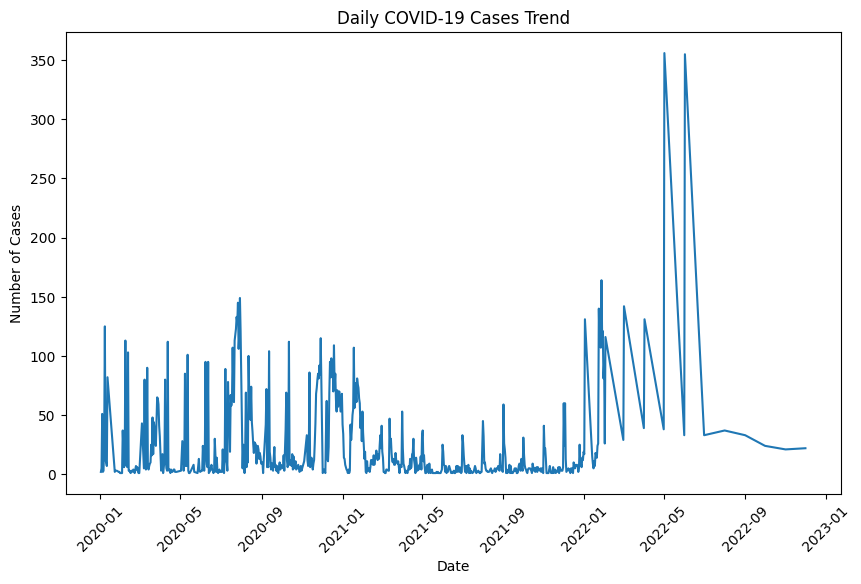

In [26]:
# Convert the date format to datetime
df_sit['Report date'] = pd.to_datetime(df_sit['Report date'])
# Count the number of new cases by date
daily_cases = df_sit['Report date'].value_counts().sort_index()
# Visualize daily trends in latest cases
plt.figure(figsize=(10, 6))
plt.plot(daily_cases.index, daily_cases.values)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily COVID-19 Cases Trend')
plt.xticks(rotation=45)
plt.show()

## Pie chart of gender distribution of cases 

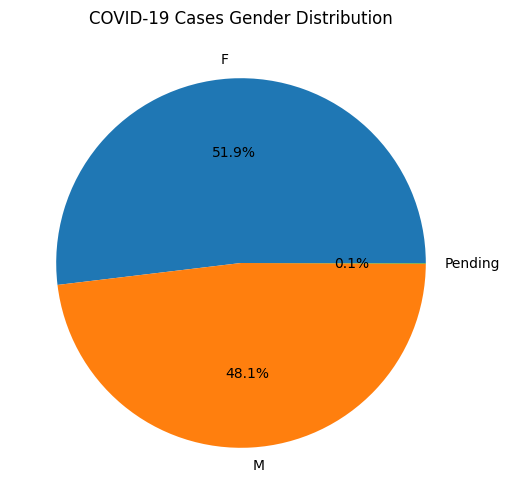

In [27]:
gender_counts = df_sit['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('COVID-19 Cases Gender Distribution')
plt.show()

# Task2: Predict the trend of the number of cases in mainland China

## Linear Regression Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [6]:
df_mai = df_mai[['As of date', 'Number of reported/confirmed cases']]
df_mai['Date'] = pd.to_datetime(df_mai['As of date'])
df_mai.sort_values('Date', inplace=True)

# Calculate the number of new confirmed cases per day
df_mai['Daily_Cases'] = df_mai['Number of reported/confirmed cases'].diff()
df_mai=df_mai.dropna() 

/var/folders/tw/nqw5wrqn2yb5vr_9x_yjwcbc0000gn/T/ipykernel_1159/3054565123.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_mai['Date'] = pd.to_datetime(df_mai['As of date'])


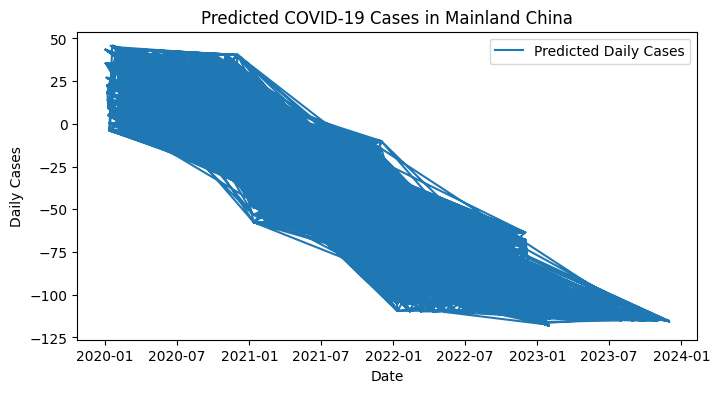

In [11]:
# Split the training set and test set
X = df_mai[['Date']]
y = df_mai['Daily_Cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Train the model
model = LinearRegression()
model.fit(X_train.index.to_numpy().reshape(-1, 1), y_train)
y_pred = model.predict(X_test.index.to_numpy().reshape(-1, 1))

# Visualization
plt.figure(figsize=(8, 4))

plt.plot(X_test['Date'], y_pred, label='Predicted Daily Cases')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Predicted COVID-19 Cases in Mainland China')
plt.legend()
plt.show()

## MLP Classifier Model

In [ ]:
# Split the training set and test set
X = df_mai[['Date']]
y = df_mai['Daily_Cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train,y_train)
pre=clf.predict(X_test)
acc=accuracy_score(pre,y_test)
acc

/Users/julia/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# Task3: Analyze the high-frequency areas visited by COVID-19 cases

## Count the COVID-19 cases distribution by district

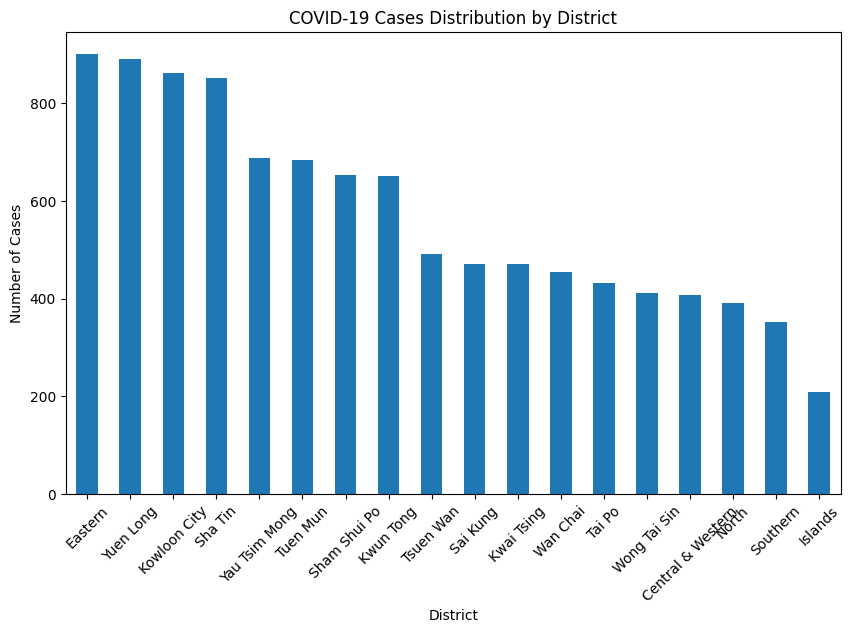

In [46]:
district_counts = df_bul['District'].value_counts()

# Descending order by number of cases
district_counts = district_counts.sort_values(ascending=False)

# Draw a bar chart
plt.figure(figsize=(10, 6))
district_counts.plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Distribution by District')
plt.xticks(rotation=45)
plt.show()

## Cluster analysis of buildings visited by COVID-19 cases

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

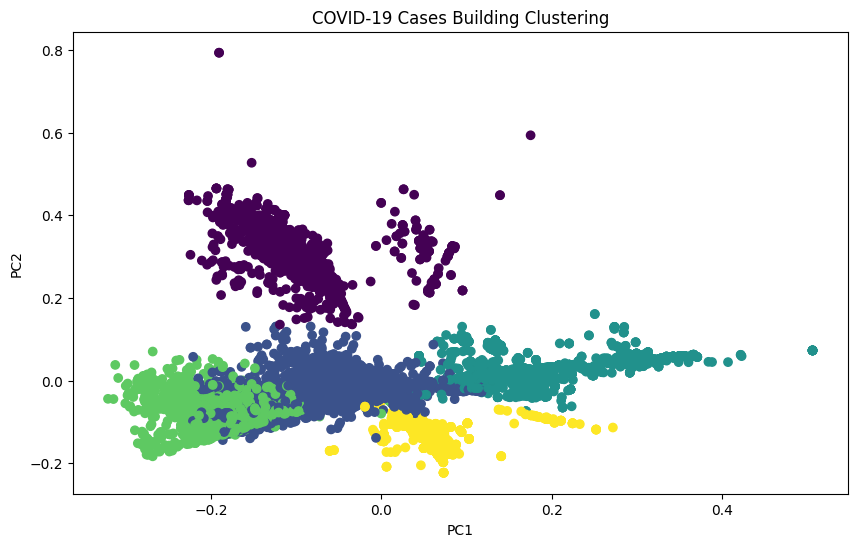

In [55]:
X = df_bul['Building name']

# Converts textual features to numerical features
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Cluster
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_vectorized)

# Dimension reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vectorized.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('COVID-19 Cases Building Clustering')
plt.show()

# Task4: Analyze the COVID-19 situation of areas outside China

## Vehicle data analysis

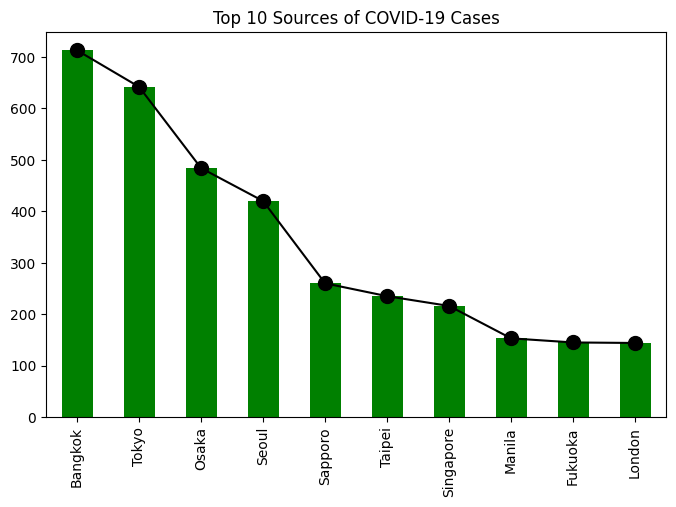

In [233]:
source_counts = df_veh['Departure & arrival'].value_counts()
top_10_sources = source_counts.head(10)
plt.figure(figsize=(8, 5))
top_10_sources.plot(kind='bar',color='green')
plt.plot(top_10_sources.index, top_10_sources, color='black', marker='o', markersize = 10)
plt.title('Top 10 Sources of COVID-19 Cases')
plt.show()

## COVID-19 Cases from Countries outside mainland China

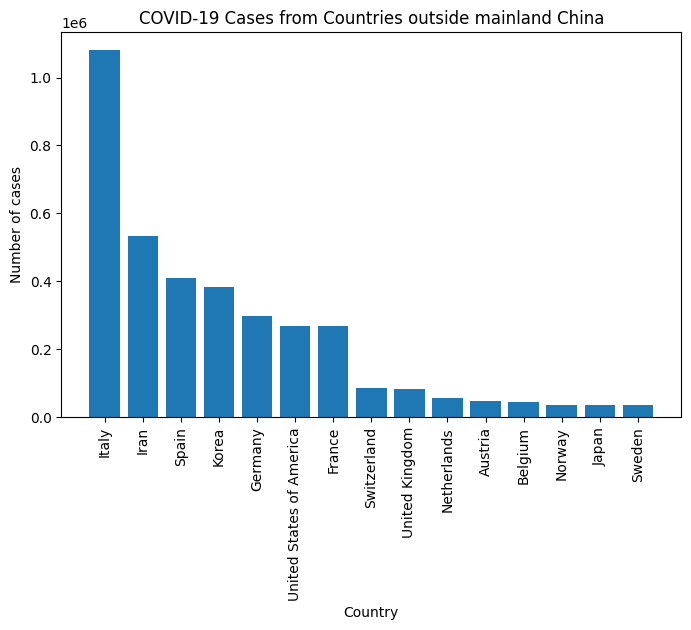

In [255]:
# Group by Country/Area and sum the Number of cases/confirmed cases
country_cases = df_out.groupby('Other countries/areas')['Number of cases/confirmed cases'].sum().reset_index()

# Sort by Number of cases/confirmed cases in descending order
country_cases.sort_values('Number of cases/confirmed cases', ascending=False, inplace=True)
top_10_country = country_cases.head(15)

# Visualize the results
plt.figure(figsize=(8, 5))
plt.bar(top_10_country['Other countries/areas'], top_10_country['Number of cases/confirmed cases'])
plt.xlabel('Country')
plt.ylabel('Number of cases')
plt.title('COVID-19 Cases from Countries outside mainland China')
plt.xticks(rotation=90)
plt.show()